# Correlation
 
Relate to the way people use the term **correlation**, often they mention events or things that are expected to happen together. We may use the term loosely and may interprate that one is causing the other. for e.g. "It rains whenever I wear white", we know that this cant be true but statements such as these sometimes could be interpreted incorrectly as one causing the other. When we study correlation, we are always told **correlation is not causation**. Finally, the goal here is to understand the metrics available to measure correlation given some data and avoid any causal inference.


The most common form of **correlation coefficient** that you will find is called **pearson correlation coefficient**. Normally, when we say correlation it is assumed that its pearson correlation but it's best to clarify.

We will discuss 3 types correlation coefficients but you may find a few more in the literature.
 1. Pearson correlation coefficient
 2. Spearman correlation coefficient
 3. Point Biseral correlation coefficient
 
## Pearson correlation coefficient
 
As mentioned this is the most common form of correlation coefficient, and its computed as follows.
 
 $$
 \rho_{X, Y} = \frac{\mathbb{E}[(X - \mu_{X})(Y - \mu_{Y})]}{\sigma_{X} \sigma_{Y}}
 $$ (eq.1)
 
The numerator represents covariance between $X$ and $Y$ and the denominator represents the standard deviation.
The use of standard deviation suggests that pearson coefficient assumes that the distribution is a form of normal/gaussian distribution. Thus, this measure is a parametric measure.


Here are few important elements to remember about the coefficient.
* It measures a linear relationship/trend between two numerical variables and is effected by outliers.
* Correlation ranges from -1 to 1, wherein value of -1 represents perfect negative. While a value of 1 reflects perfect positive correlation.
* A positive correlation value suggests that both quantities increase together.
* A negative correlation value suggests that as one value increases the other decreases.
* A value of zero(0) correlation suggests that there is no linear relationship between the quantities.
* Correlation value is unit less as you would observe from the equation above (the units cancel out),
which means it isn't associate with any measurement and so can be used for comparisons. for e.g correlation value of 0.9 is the same even if the value is measured in kilometers or miles.

### Coefficient Strength

We understand from above that the correlation value stays between $[-1,1]$ and that they represent negative or positive linear trend with a value of $0$ suggesting no linear trend. In practice, we would see values such as $-0.36$ or $0.36$, $-0.50$, $0.50$ or $-0.8$ or $0.8$ and deciding if the value is high or low really depends on the problem.
However, generally a value below $-0.5$ $[-0.5<=v<=-1]$ or above $0.5$ $[0.5>=v>=1]$ is considered a value with strong linear relationship and the values other than this is considered as having a weak relationship.

Let's demonstrate this with some code. We will import some libraries.

In [1]:
%load_ext nb_black
# importing some libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.stats import pearsonr

<IPython.core.display.Javascript object>

In [2]:
# Create different scenarios of correlation

perfect_pos_corr = [(x, x + 2) for x in range(1, 11)]

perfect_neg_corr = [
    (x, y) for x, y in zip(range(1, 11), sorted(range(1, 11), reverse=True))
]
np.random.seed(0)
no_corr = [(np.random.randn(500), np.random.randn(500))]

p2 = np.random.randn(500)
pos_corr_outlier = [(x, y) for x, y in zip(p2, p2 + np.random.randn(500) * 0.5)]

p3 = np.random.rand(50)
pos_corr_outlier[-50:] = [(x, y) for x, y in zip(p3, p3 - 5 * np.random.rand(50) * 1.5)]


x1, y1 = zip(*perfect_pos_corr)
x2, y2 = zip(*perfect_neg_corr)
x3, y3 = zip(*no_corr)
x4, y4 = zip(*pos_corr_outlier)

<IPython.core.display.Javascript object>

* The first graph shows a **perfect positive** linear trend with a value of $1$, while the second graph shows a **perfect negative** trend, with a value of $-1$.
 
* We also have the third graph which almost certainly shows a random set of points with no linear trend and thus it has a correlation value of nearly ($-0.04$) zero. 
 
* The last plot is rather interesting because, it has positive linear trend but with few points outside of the distribution. We observe that by adding a few of these (outliers) points we have affected the pearson correlation cofficient by a large degree. Although to our eyes we still observe strong linear trend, the coefficient value suggests that there is a **weak linear positive relationship** value of $0.45$ i.e. value below $0.5$.

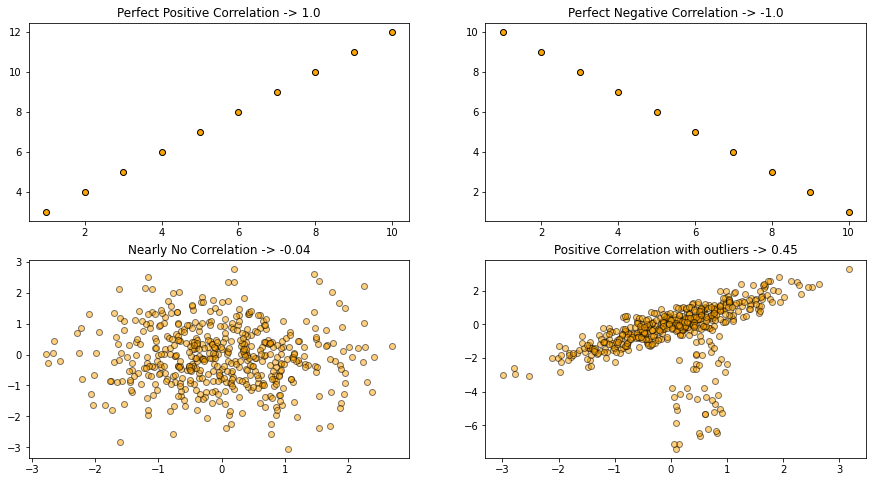

<IPython.core.display.Javascript object>

In [3]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
ax1.scatter(x1, y1, color="orange", edgecolor="k")
ax1.set_title(f"Perfect Positive Correlation -> {round(pearsonr(x1,y1)[0],2)}")
ax2.scatter(x2, y2, color="orange", edgecolor="k")
ax2.set_title(f"Perfect Negative Correlation -> {round(pearsonr(x2,y2)[0],2)}")
ax3.scatter(x3, y3, alpha=0.5, color="orange", edgecolor="k")
ax3.set_title(f"Nearly No Correlation -> {round(pearsonr(x3[0],y3[0])[0],2)}")
ax4.scatter(x4, y4, alpha=0.5, color="orange", edgecolor="k")
ax4.set_title(
    f"Positive Correlation with outliers -> {round(pearsonr(x4,y4)[0],2)}"
)
plt.show()



 ## Spearman Correlation Coefficient
 Spearman correlation coefficient has some advantages over pearson correlation coefficient.
 It performs well in cases where pearson correlation coefficient doesnt pick the linear/non linear strength of relationship between the features. It performs well to capture monotonic relationships and is defined as follows,
 
 $$
 r_{s} = \frac{cov((R(X),R(Y))}{\sigma_{R(X)} \sigma_{R(Y)}}
 $$
 
 The numerator represents covariance between the rank of the values in X and in Y and the denominator represents the standard deviation of the rank.
 So if you had a table with examples such as below, ranks are calculated in the following manner.
 

 | X  | Y  | R(X) | R(Y) |
 |----|----|------|------|
 | 20 | 5  | 2   | 3    |
 | 10 | 2  | 1    | 1    |
 | 50 | 80 | 3    | 2    |


 <br><br>
 Here are few important elements to remember about the coefficient.
 * It measures linear or non-linear trend between two numerical variables.
 * It is not as sensitive to outliers as pearson correlation coefficient is.
 * It ranges from -1 to 1, wherein value of -1 represents perfect negative. While a value of 1 reflects perfect positive correlation.
 * A positive correlation value suggests that both quantities increase together monotonically.
 * A negative correlation value suggests that as one value increases the other decreases monotonically.
 * A value of zero(0) correlation suggests that there is no linear/non linear relationship between the quantities.
 * Lastly, the value is unit less (same as pearson) and can be used for comparisons.

As we study Spearman correlation lets bring pearson as a reference and compare the two correlation coefficient. 

* For the first and second plot, both capture linear trend perfectly.
 
* For the third plot, once again in the absence of trend the value is near zero and it is as we expected. 
 
* For the last plot we observe that while the pearson value is 0.45, spearman is around 0.65. In this scenario, I believe the spearman value more as it correctly identifies the trend and doesnt penalise outliers as much as pearson.

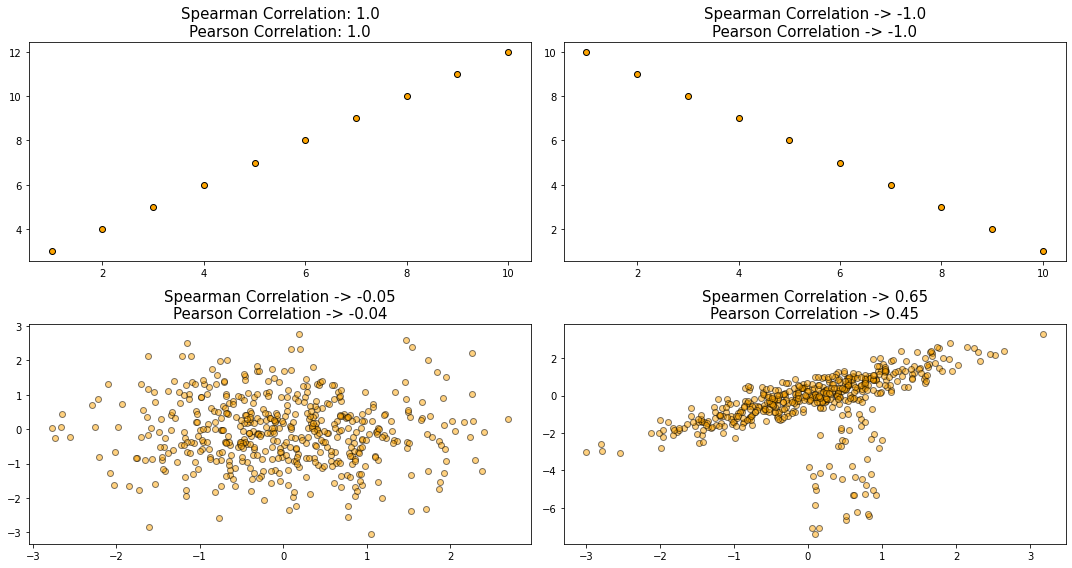

<IPython.core.display.Javascript object>

In [4]:
from scipy.stats.stats import spearmanr

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
ax1.scatter(x1, y1, color="orange", edgecolor="k")
ax1.set_title(
    f"Spearman Correlation: {round(spearmanr(x1,y1)[0],2)}\
\nPearson Correlation: {round(pearsonr(x1,y1)[0],2)}",
    size=15,
)
ax2.scatter(x2, y2, color="orange", edgecolor="k")
ax2.set_title(
    f"Spearman Correlation -> {round(spearmanr(x2,y2)[0],2)}\
\nPearson Correlation -> {round(pearsonr(x2,y2)[0],2)}",
    size=15,
)

ax3.scatter(x3, y3, alpha=0.5, color="orange", edgecolor="k")

ax3.set_title(
    f"Spearman Correlation -> {round(spearmanr(x3[0],y3[0])[0],2)}\
\nPearson Correlation -> {round(pearsonr(x3[0],y3[0])[0],2)}",
    size=15,
)
ax4.scatter(x4, y4, alpha=0.5, color="orange", edgecolor="k")
ax4.set_title(
    f"Spearmen Correlation -> {round(spearmanr(x4,y4)[0],2)}\
\nPearson Correlation -> {round(pearsonr(x4,y4)[0],2)}",
    size=15,
)
plt.tight_layout()
plt.show()

Let's compare the two coefficients by using a few more plots. 

In [5]:
np.random.seed(1)
scatter_dataX1 = np.random.randn(100)
scatter_dataY1 = scatter_dataX1 + np.random.randn(100) * 0.5
scatter_dataY1[-10:] = 3 + np.random.rand(1)

scatter_dataX2 = np.sort(np.random.randn(100))
scatter_dataY2 = scatter_dataX2 + np.random.randn(100) * 0.5
scatter_dataY2[-10:] = 3 + np.random.rand(1)

scatter_dataX3 = np.sort(np.random.randn(100))
scatter_dataY3 = scatter_dataX3 + np.random.randn(100) * 0.1
scatter_dataX3[-10:] = -1 + np.random.rand(1)


scatter_dataX4 = np.linspace(-10, 10, 100)
scatter_dataY4 = scatter_dataX4 ** 3  # + np.random.randn(100)*0.05
# scatter_dataX4[-10:] = -1 + np.random.rand(1)

<IPython.core.display.Javascript object>

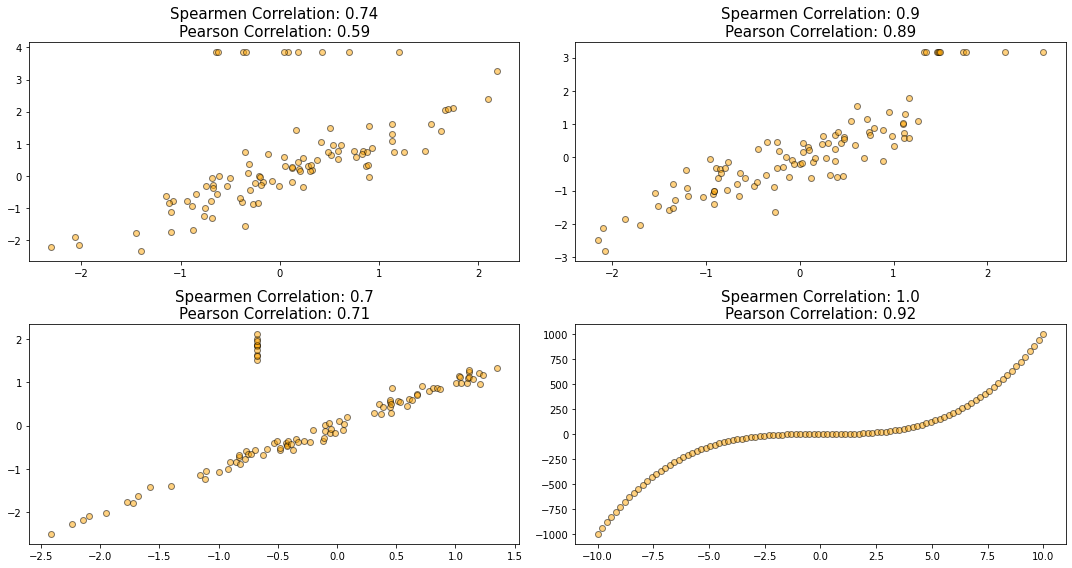

<IPython.core.display.Javascript object>

In [6]:
_, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
ax1.scatter(scatter_dataX1, scatter_dataY1, alpha=0.5, color="orange", edgecolor="k")
ax1.set_title(
    f"Spearmen Correlation: {round(spearmanr(scatter_dataX1,scatter_dataY1)[0],2)}\
\nPearson Correlation: {round(pearsonr(scatter_dataX1,scatter_dataY1)[0],2)}",
    size=15,
)

ax2.scatter(scatter_dataX2, scatter_dataY2, alpha=0.5, color="orange", edgecolor="k")
ax2.set_title(
    f"Spearmen Correlation: {round(spearmanr(scatter_dataX2,scatter_dataY2)[0],2)}\
\nPearson Correlation: {round(pearsonr(scatter_dataX2,scatter_dataY2)[0],2)}",
    size=15,
)

ax3.scatter(scatter_dataX3, scatter_dataY3, alpha=0.5, color="orange", edgecolor="k")
ax3.set_title(
    f"Spearmen Correlation: {round(spearmanr(scatter_dataX3,scatter_dataY3)[0],2)}\
\nPearson Correlation: {round(pearsonr(scatter_dataX3,scatter_dataY3)[0],2)}",
    size=15,
)

ax4.scatter(scatter_dataX4, scatter_dataY4, alpha=0.5, color="orange", edgecolor="k")
ax4.set_title(
    f"Spearmen Correlation: {round(spearmanr(scatter_dataX4,scatter_dataY4)[0],2)}\
\nPearson Correlation: {round(pearsonr(scatter_dataX4,scatter_dataY4)[0],2)}",
    size=15,
)
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
from sklearn.datasets import load_boston

# load the boston dataset of houses,
# It contains the value of houses in the area of boston in thousands along with multiple features of the houses.
# load the dataset
boston = load_boston()
# required components of the sklearn bunch object
data = boston["data"]
target = boston["target"]
cols = boston["feature_names"]

# creating a pandas dataframe
# fmt:off
pd_df = (pd.DataFrame(data, columns=cols)
         .assign(target=target))
pd_df.columns = pd_df.columns.str.lower()

<IPython.core.display.Javascript object>

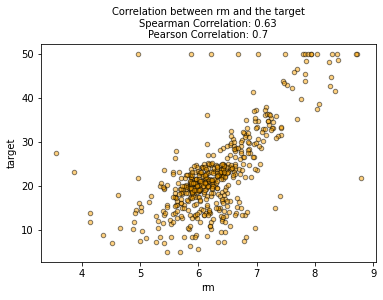

<IPython.core.display.Javascript object>

In [8]:
# fmt: on
fig, ax = plt.subplots()
subset_df = pd_df.loc[:, ["rm", "target"]]
subset_df.plot(
    kind="scatter", x="rm", y="target", alpha=0.5, color="orange", edgecolor="k", ax=ax,
)
ax.set_title(
    f"Correlation between rm and the target\nSpearman Correlation: {round(subset_df.corr(method='spearman')['target'][0],2)}\
\nPearson Correlation: {round(subset_df.corr(method='pearson')['target'][0],2)}",
    fontweight="normal",
    size=10,
)
plt.show()

<AxesSubplot:>

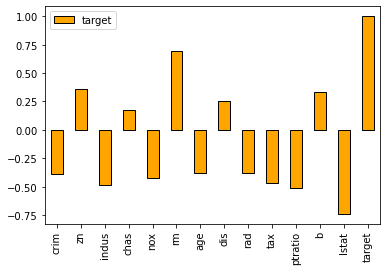

In [9]:
# correlation ranges from -1 to 1
corr = pd_df.corr()
corr[["target"]].plot(kind="bar", color="orange",edgecolor="k")